Интервальный ряд:
[29.0-31.7): 5
[31.7-34.4): 9
[34.4-37.1): 22
[37.1-39.9): 18
[39.9-42.6): 30
[42.6-45.3): 9
[45.3-48.0): 7

Выборочная средняя: 38.75
Выборочная дисперсия: 17.35
Выборочное СКО: 4.17


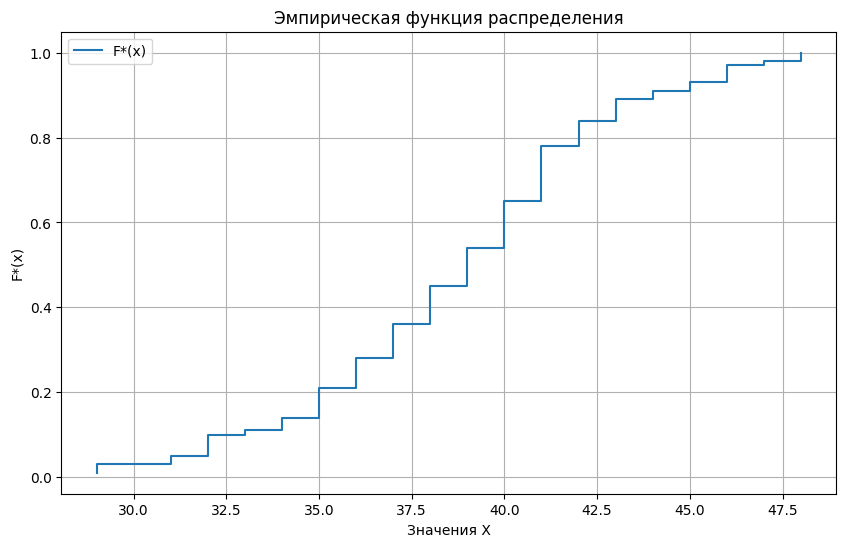

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Исходные данные (в виде списка)
data = [
    46, 34, 39, 40, 36, 46, 40, 41, 48, 41,
    46, 38, 39, 41, 38, 36, 36, 43, 37, 39,
    35, 32, 39, 31, 40, 43, 41, 43, 37, 34,
    42, 39, 29, 32, 42, 38, 39, 35, 42, 45,
    41, 35, 40, 37, 37, 39, 36, 41, 37, 35,
    38, 46, 44, 37, 38, 29, 38, 42, 38, 38,
    36, 32, 33, 37, 42, 45, 44, 40, 40, 42,
    29, 34, 40, 35, 32, 47, 41, 43, 41, 40,
    41, 31, 40, 32, 38, 37, 41, 36, 39, 48,
    39, 41, 41, 41, 35, 40, 40, 36, 43, 35
]

# 1. Интервальный ряд
n = len(data)  # n = 100
min_val, max_val = min(data), max(data)
k = int(1 + 3.322 * np.log10(n))  # Формула Стёрджеса
h = (max_val - min_val) / k  # Ширина интервала

bins = np.linspace(min_val, max_val, k + 1)  # Границы интервалов
hist, bin_edges = np.histogram(data, bins=bins)

# Таблица интервалов
print("Интервальный ряд:")
for i in range(len(hist)):
    print(f"[{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}): {hist[i]}")

# 2. Выборочные характеристики
mean = np.mean(data)  # Выборочная средняя
variance = np.var(data, ddof=0)  # Выборочная дисперсия (несмещённая)
std_dev = np.sqrt(variance)  # СКО

print(f"\nВыборочная средняя: {mean:.2f}")
print(f"Выборочная дисперсия: {variance:.2f}")
print(f"Выборочное СКО: {std_dev:.2f}")

# 3. Эмпирическая функция распределения (F*(x))
sorted_data = np.sort(data)
y = np.arange(1, n + 1) / n  # Накопленные частоты

# График
plt.figure(figsize=(10, 6))
plt.step(sorted_data, y, where='post', label='F*(x)')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения X')
plt.ylabel('F*(x)')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
import numpy as np
from scipy.stats import linregress

# Исходные данные из корреляционной таблицы
x_values = [5, 7, 9, 11, 13, 15]  # Значения X
y_values = [2, 6, 10, 14, 18]      # Значения Y

# Матрица частот n_ij (строки - x_values, столбцы - y_values)
frequencies = np.array([
    [2, 7, 0, 0, 0],    # x=5
    [5, 21, 9, 0, 0],   # x=7
    [0, 6, 27, 2, 0],   # x=9
    [0, 1, 4, 6, 0],    # x=11
    [0, 0, 1, 3, 2],    # x=13
    [0, 0, 0, 2, 1]     # x=15
])

# Создание массивов данных с учетом частот
x_data = []
y_data = []
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        count = frequencies[i, j]
        if count > 0:
            x_data.extend([x] * count)
            y_data.extend([y] * count)

# Преобразование в numpy массивы
x_data = np.array(x_data)
y_data = np.array(y_data)

# Расчет коэффициентов регрессии вручную
cov_xy = np.cov(x_data, y_data, ddof=0)[0, 1]  # Ковариация
var_x = np.var(x_data, ddof=0)                 # Дисперсия X
mean_x = np.mean(x_data)                       # Среднее X
mean_y = np.mean(y_data)                       # Среднее Y

a = cov_xy / var_x                             # Наклон (slope)
b = mean_y - a * mean_x                        # Перехват (intercept)

# Проверка с помощью scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Вывод результатов
print("Результаты расчета:")
print(f"Уравнение линейной регрессии: y = {a:.4f}x + {b:.4f}")
print(f"Проверка (scipy): y = {slope:.4f}x + {intercept:.4f}")
print(f"Коэффициент корреляции (r): {r_value:.4f}")

Результаты расчета:
Уравнение линейной регрессии: y = 1.2079x + -1.5710
Проверка (scipy): y = 1.2079x + -1.5710
Коэффициент корреляции (r): 0.7709
